In [ ]:
using StatsPlots, Statistics, Distributions, Random

In [2]:
function generate_midpoints(n_bins)
    quantiles = Array{Float64}(undef, n_bins)

    #generate the quantile midpoints
    for i = 1:n_bins
        quantiles[i] = i/n_bins - (1/2)*(1/n_bins)
    end

    return vec(quantiles)
end

generate_midpoints (generic function with 1 method)

In [3]:
function add_distributions(list1, list2)
    sum_list = Array{Float64}(undef, length(list1)^2)
    
    list1 = repeat(list1, length(list1))
    list1 = sort(list1)
    list2 = repeat(list2, length(list2))
    
    for i in eachindex(sum_list)
        sum_list[i] = list1[i] + list2[i]
    end
    
    return vec(sort(sum_list))
end

add_distributions (generic function with 1 method)

In [4]:
function re_bin(distribution, n_bins)
    rebinned = reshape(distribution, n_bins, n_bins)
    rebinned = mean(rebinned, dims = 1)
    
    return vec(rebinned)
end

re_bin (generic function with 1 method)

In [175]:
n_bins = 8
n_RVs = 100000

μ = 4

RV_list = Array{Distribution}(undef, n_RVs)

for i = 1:n_RVs
    temp_RV = Exponential(μ)
    RV_list[i] = temp_RV
end

In [176]:
quantile_boundaries = generate_midpoints(n_bins)
println(quantile_boundaries)

final_RV = pop!(RV_list)
final_RV = quantile(final_RV, quantile_boundaries)
# println(final_RV)

for RV in RV_list
    temp_list = quantile(RV, quantile_boundaries)
    
    final_RV = add_distributions(temp_list, final_RV)
    final_RV = re_bin(final_RV, n_bins) 
end

[0.0625, 0.1875, 0.3125, 0.4375, 0.5625, 0.6875, 0.8125, 0.9375]


In [177]:
println("Expected average (n*μ): ", n_RVs*μ)
println("Computed average: ", mean(final_RV))

println("Normalized error: ", (n_RVs*μ - mean(final_RV))/n_RVs*μ)

Expected average (n*μ): 400000
Computed average: 382931.50095271115
Normalized error: 0.6827399618915538


In [196]:
println(final_RV)

mean(final_RV)

[382893.5882498957, 382904.4204507001, 382915.2526515046, 382926.0848523091, 382936.91705311346, 382947.74925391783, 382958.5814547222, 382969.4136555266]


382931.50095271115

In [197]:
# true_sigma = (n_RVs * (1/(μ^2)))^(1/2)
# print(true_sigma)
true_mu = n_RVs/μ

25000.0

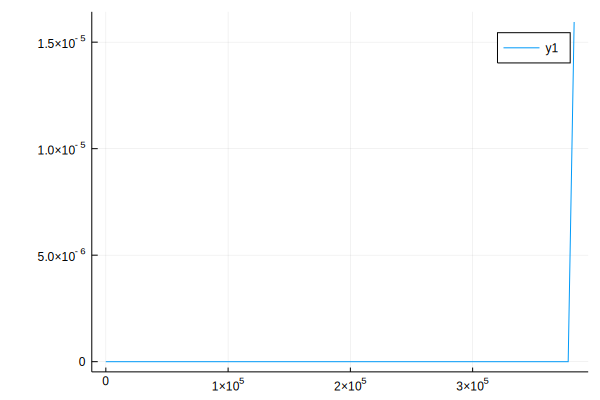

In [195]:
test_RV = Erlang(n_RVs, μ)
test_quantiles = quantile(test_RV, quantile_boundaries)

plot(final)
# plot!(test_RV)

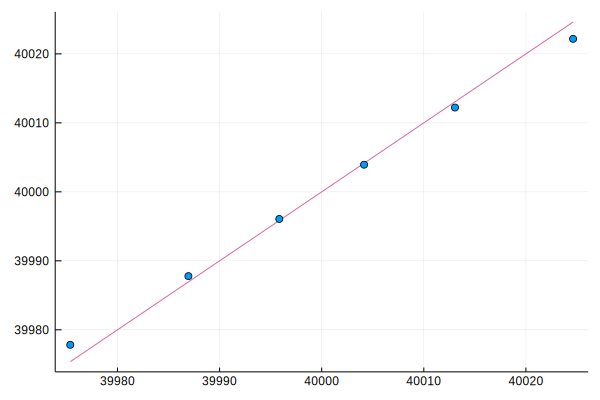

In [172]:
qqnorm(test_quantiles)

In [173]:
# final_RV = [i for i in zip(final_RV, quantile_boundaries)]
print(final_RV)

[38255.23739247394, 38266.069593278386, 38276.901794082805, 38287.7339948872, 38298.56619569163, 38309.39839649605, 38320.23059730045, 38331.062798104875]

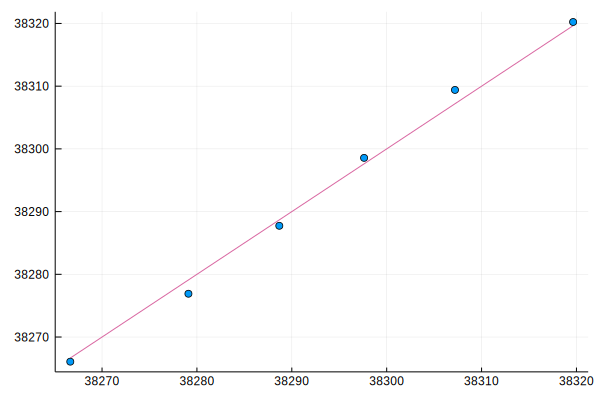

In [174]:
qqnorm(final_RV)